In [1]:
import numpy as np
import pickle
import sys
import os
import dsc
from dsc.query_engine import Query_Processor as dscQP
from dsc import dsc_io
import pickle

from pymir import pd_utils

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils

import sys
sys.path.append('../dsc/functions/')

In [2]:
def stratify_dfcol(df, colname, value):
    return pd_utils.select_dfrows(df, [f"$({colname}) == {value}"])

def stratify_dfcols(df, condition_list):
    for (colname, value) in condition_list:
        df = stratify_dfcol(df, colname, value)
    return df

In [3]:
dsc_output = "/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_indep_gradvi"

In [4]:
db = os.path.join(dsc_output, os.path.basename(os.path.normpath(dsc_output)) + ".db")
print(db)

/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_indep_gradvi/linreg_indep_gradvi.db


In [5]:
'''
Target can be any module name, group name
or module.variable
There are two groups of methods, one of them 
needs to be force removed during query (groups = ["fit_cpt:"])
'''

target = ["simulate", "simulate.sfix", "fit", "mse.err", "simulate.se", "coef_mse.err"]
#condition = ["simulate.sfix == 2", "simulate.signal == 'normal'", "simulate.dims == '(50, 200)'"]
#groups = ["fit_cpt:"]
condition = [""]

In [6]:
qp = dscQP(db, target, condition)
qp_df = qp.output_table
#qp_df
df_gv   = stratify_dfcols(qp_df, [('simulate.sfix', 20), ('fit', 'gradvi_compound')])
df_cavi = stratify_dfcols(qp_df, [('simulate.sfix', 20), ('fit', 'mr_ash')])

df_gv

,DSC,simulate,simulate.sfix,simulate.se:output,simulate.output.file,fit,fit.output.file,mse.err:output,coef_mse.err:output
8,1,equicorrgauss,20,equicorrgauss/equicorrgauss_1,equicorrgauss/equicorrgauss_1,gradvi_compound,gradvi_compound/equicorrgauss_1_gradvi_compound_1,mse/equicorrgauss_1_gradvi_compound_1_predict_...,NA
9,2,equicorrgauss,20,equicorrgauss/equicorrgauss_2,equicorrgauss/equicorrgauss_2,gradvi_compound,gradvi_compound/equicorrgauss_2_gradvi_compound_1,mse/equicorrgauss_2_gradvi_compound_1_predict_...,NA
10,1,equicorrgauss,20,equicorrgauss/equicorrgauss_1,equicorrgauss/equicorrgauss_1,gradvi_compound,gradvi_compound/equicorrgauss_1_gradvi_compound_1,NA,coef_mse/equicorrgauss_1_gradvi_compound_1_coe...
11,2,equicorrgauss,20,equicorrgauss/equicorrgauss_2,equicorrgauss/equicorrgauss_2,gradvi_compound,gradvi_compound/equicorrgauss_2_gradvi_compound_1,NA,coef_mse/equicorrgauss_2_gradvi_compound_1_coe...


In [7]:
idx = 0

In [8]:
df_gv['fit.output.file'].iloc[idx]

'gradvi_compound/equicorrgauss_1_gradvi_compound_1'

In [9]:
df_gv['simulate.output.file'].iloc[idx]

'equicorrgauss/equicorrgauss_1'

In [10]:
df_cavi['fit.output.file'].iloc[idx]

'mr_ash/equicorrgauss_1_mr_ash_1'

In [11]:
_resfile = os.path.join(dsc_output, f"{df_gv['fit.output.file'].iloc[idx]}.pkl")
res = dsc_io.load_dsc(_resfile)

_resfile_cavi = os.path.join(dsc_output, f"{df_cavi['fit.output.file'].iloc[idx]}.rds")
res_cavi = dsc_io.load_dsc(_resfile_cavi)
    
_datafile = os.path.join(dsc_output, f"{df_gv['simulate.output.file'].iloc[idx]}.pkl")
data = dsc_io.load_dsc(_datafile)

INFO: cffi mode is CFFI_MODE.ANY
INFO: R home found: /software/R-3.6.1-el7-x86_64/lib64/R
INFO: R library path: /software/R-3.6.1-el7-x86_64/lib64/R/lib:/usr/local/lib64:/software/java-1.8-x86_64/jre/lib/amd64/server:/software/intel/parallel_studio_xe_2020_update1/mkl/lib/intel64:/software/R-3.6.1-el7-x86_64/lib64/R/lib:/software/R-3.6.1-el7-x86_64/lib64:/software/curl-7.50-el7-x86_64/lib:/software/java-1.8-x86_64/lib:/software/openblas-0.2.19-el7-x86_64/lib:/software/gcc-10.2.0-el7-x86_64/lib64:/software/gcc-10.2.0-el7-x86_64/lib:/software/slurm-current-el7-x86_64/lib64:/software/slurm-current-el7-x86_64/lib:/software/git-2.10-el7-x86_64/lib64:/software/subversion-1.9.4-el7-x86_64/lib:/software/serf-1.3.9-el7-x86_64/lib
INFO: LD_LIBRARY_PATH: /software/intel/parallel_studio_xe_2020_update1/mkl/lib/intel64:/software/R-3.6.1-el7-x86_64/lib64/R/lib:/software/R-3.6.1-el7-x86_64/lib64:/software/curl-7.50-el7-x86_64/lib:/software/java-1.8-x86_64/lib:/software/openblas-0.2.19-el7-x86_64/lib:

In [12]:
res['beta_est']

array([-6.15985009e-05,  4.47688748e-05, -5.37189630e-04, ...,
       -5.11946557e-05,  1.80306382e-04,  4.07200074e-05])

In [13]:
res_cavi['beta_est']

array([[-6.81142957e-05],
       [ 5.03630619e-05],
       [-5.53618961e-04],
       ...,
       [-5.57881042e-05],
       [ 1.91170751e-04],
       [ 4.54464220e-05]])

In [14]:
np.squeeze(res_cavi['beta_est'])

array([-6.81142957e-05,  5.03630619e-05, -5.53618961e-04, ...,
       -5.57881042e-05,  1.91170751e-04,  4.54464220e-05])

In [15]:
data['beta']

array([0., 0., 0., ..., 0., 0., 0.])

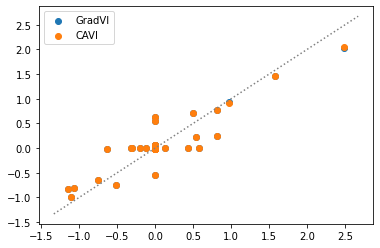

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data['beta'], res['beta_est'], label = 'GradVI')
ax1.scatter(data['beta'], np.squeeze(res_cavi['beta_est']), label = 'CAVI')
mpl_utils.plot_diag(ax1)
ax1.legend()
plt.show()

In [17]:
data.keys()

dict_keys(['X', 'y', 'Xtest', 'ytest', 'n', 'p', 's', 'beta', 'se', 'DSC_DEBUG'])

In [18]:
import fit_gradvi
from gradvi.inference import LinearRegression

In [19]:
res_cavi['model']['fit']['sigma2']

9.455354077098507

In [27]:
prior = fit_gradvi.get_ash_scaled(sparsity = None, ncomp = 20, skbase = 2.0)

In [28]:
gv1 = LinearRegression(debug = True)

In [29]:
prior.sk

array([0.        , 0.03526492, 0.07177346, 0.10956947, 0.14869835,
       0.18920712, 0.23114441, 0.27456063, 0.31950791, 0.36604026,
       0.41421356, 0.4640857 , 0.51571657, 0.5691682 , 0.62450479,
       0.68179283, 0.74110113, 0.80250093, 0.86606598, 0.93187266])

In [32]:
gv1.fit(data['X'], data['y'], prior)
#print(gv1.residual_var)

2022-06-29 14:00:06,766 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:06,767 | gradvi.models.linear_model               | DEBUG   | Residual variance = 2.2784522003987093
2022-06-29 14:00:06,886 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:06,887 | gradvi.models.linear_model               | DEBUG   | Residual variance = 2.525864693656287
2022-06-29 14:00:07,046 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 1
2022-06-29 14:00:07,049 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:07,049 | gradvi.models.linear_model               | DEBUG   | Residual variance = 2.795273194674726
2022-06-29 14:00:07,190 | gradvi.inference.linear_regression       | DEBUG   | Callback iterati

2022-06-29 14:00:09,933 | gradvi.models.linear_model               | DEBUG   | Residual variance = 15.550782469035932
2022-06-29 14:00:10,047 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:10,047 | gradvi.models.linear_model               | DEBUG   | Residual variance = 15.50984927783469
2022-06-29 14:00:10,160 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 20
2022-06-29 14:00:10,163 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:10,164 | gradvi.models.linear_model               | DEBUG   | Residual variance = 15.25041137094633
2022-06-29 14:00:10,274 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 21
2022-06-29 14:00:10,280 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled

2022-06-29 14:00:13,096 | gradvi.models.linear_model               | DEBUG   | Residual variance = 13.106883990063224
2022-06-29 14:00:13,228 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:13,229 | gradvi.models.linear_model               | DEBUG   | Residual variance = 13.05482046296039
2022-06-29 14:00:13,363 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 36
2022-06-29 14:00:13,367 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:13,368 | gradvi.models.linear_model               | DEBUG   | Residual variance = 13.08296224812894
2022-06-29 14:00:13,499 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 37
2022-06-29 14:00:13,503 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled

2022-06-29 14:00:16,347 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 50
2022-06-29 14:00:16,352 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:16,352 | gradvi.models.linear_model               | DEBUG   | Residual variance = 12.689894903403832
2022-06-29 14:00:16,487 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 51
2022-06-29 14:00:16,491 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:16,493 | gradvi.models.linear_model               | DEBUG   | Residual variance = 12.639640793813248
2022-06-29 14:00:16,599 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 52
2022-06-29 14:00:16,603 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-

2022-06-29 14:00:19,471 | gradvi.models.linear_model               | DEBUG   | Residual variance = 11.461252745453685
2022-06-29 14:00:19,606 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 67
2022-06-29 14:00:19,609 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:19,610 | gradvi.models.linear_model               | DEBUG   | Residual variance = 11.145789295011756
2022-06-29 14:00:19,747 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:19,748 | gradvi.models.linear_model               | DEBUG   | Residual variance = 11.427961818276874
2022-06-29 14:00:19,854 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 68
2022-06-29 14:00:19,857 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scal

2022-06-29 14:00:22,479 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.907979742572632
2022-06-29 14:00:22,615 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 87
2022-06-29 14:00:22,619 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:22,619 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.907756096009704
2022-06-29 14:00:22,753 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 88
2022-06-29 14:00:22,757 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:22,757 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.834636468215464
2022-06-29 14:00:22,891 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 89
2022-06-29 14:00:22,895 | gradvi.models.line

2022-06-29 14:00:25,467 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 109
2022-06-29 14:00:25,471 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:25,471 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.624615966407527
2022-06-29 14:00:25,591 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 110
2022-06-29 14:00:25,594 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:25,595 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.624412031516828
2022-06-29 14:00:25,744 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 111
2022-06-29 14:00:25,748 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06

2022-06-29 14:00:28,422 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.57445528411322
2022-06-29 14:00:28,546 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 131
2022-06-29 14:00:28,550 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:28,551 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.574921475928988
2022-06-29 14:00:28,697 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 132
2022-06-29 14:00:28,702 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:28,703 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.57485189280578
2022-06-29 14:00:28,838 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 133
2022-06-29 14:00:28,843 | gradvi.models.lin

2022-06-29 14:00:31,798 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.50674403068304
2022-06-29 14:00:31,936 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 152
2022-06-29 14:00:31,940 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:31,940 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.505883575119798
2022-06-29 14:00:32,081 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 153
2022-06-29 14:00:32,085 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:32,086 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.504241567006062
2022-06-29 14:00:32,200 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 154
2022-06-29 14:00:32,204 | gradvi.models.li

2022-06-29 14:00:34,812 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:34,813 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.505736889964798
2022-06-29 14:00:34,946 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 174
2022-06-29 14:00:34,952 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:34,952 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.504500658208531
2022-06-29 14:00:35,068 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 175
2022-06-29 14:00:35,071 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:35,071 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.50096035

2022-06-29 14:00:37,878 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 195
2022-06-29 14:00:37,882 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:37,882 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.522772661976271
2022-06-29 14:00:38,023 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 196
2022-06-29 14:00:38,027 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:38,027 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.51853024684081
2022-06-29 14:00:38,169 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 197
2022-06-29 14:00:38,173 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-

2022-06-29 14:00:40,624 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.475856584580542
2022-06-29 14:00:40,758 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 217
2022-06-29 14:00:40,762 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:40,763 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.477375613329238
2022-06-29 14:00:40,898 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 218
2022-06-29 14:00:40,902 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:40,902 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.48048355313534
2022-06-29 14:00:41,033 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 219
2022-06-29 14:00:41,037 | gradvi.models.li

2022-06-29 14:00:43,637 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:43,637 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.483239018321425
2022-06-29 14:00:43,737 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 239
2022-06-29 14:00:43,740 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:43,741 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.480655255290051
2022-06-29 14:00:43,867 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 240
2022-06-29 14:00:43,871 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:43,872 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.47685174

2022-06-29 14:00:46,341 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:46,342 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.48169191526371
2022-06-29 14:00:46,454 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 259
2022-06-29 14:00:46,457 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:46,458 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.482301726120568
2022-06-29 14:00:46,565 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 260
2022-06-29 14:00:46,570 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:46,571 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.482408377

2022-06-29 14:00:49,295 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:49,297 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.472881570612293
2022-06-29 14:00:49,425 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 279
2022-06-29 14:00:49,429 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:49,429 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.472826196064359
2022-06-29 14:00:49,546 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 280
2022-06-29 14:00:49,551 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:49,551 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.47321484

2022-06-29 14:00:52,281 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 299
2022-06-29 14:00:52,285 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:52,285 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.477906479779037
2022-06-29 14:00:52,408 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 300
2022-06-29 14:00:52,411 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-29 14:00:52,412 | gradvi.models.linear_model               | DEBUG   | Residual variance = 9.47780576450176
2022-06-29 14:00:52,535 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 301
2022-06-29 14:00:52,539 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-06-

2022-06-29 14:00:55,599 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 319
2022-06-29 14:00:55,641 | gradvi.inference.linear_regression       | DEBUG   | Terminated at iteration 319.
2022-06-29 14:00:55,641 | gradvi.inference.linear_regression       | DEBUG   | Number of iterations:     319
2022-06-29 14:00:55,642 | gradvi.inference.linear_regression       | DEBUG   | Number of callbacks:      319
2022-06-29 14:00:55,643 | gradvi.inference.linear_regression       | DEBUG   | Number of function calls: 372


In [33]:
gv1.niter

319

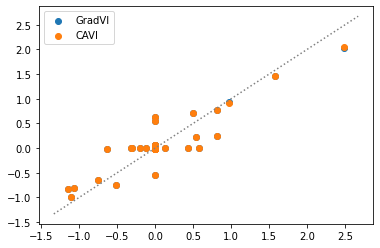

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data['beta'], gv1.coef, label = 'GradVI')
ax1.scatter(data['beta'], np.squeeze(res_cavi['beta_est']), label = 'CAVI')
ax1.legend()
mpl_utils.plot_diag(ax1)
plt.show()

## Compare DSC result with GradVI result

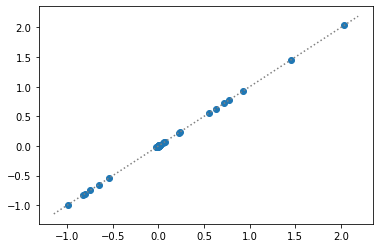

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(gv1.coef, res['beta_est'])
mpl_utils.plot_diag(ax1)
plt.show()

In [36]:
res['model']['prior']

{'smbase': 2.718281828459045,
 'sk': array([0.        , 0.03526492, 0.07177346, 0.10956947, 0.14869835,
        0.18920712, 0.23114441, 0.27456063, 0.31950791, 0.36604026,
        0.41421356, 0.4640857 , 0.51571657, 0.5691682 , 0.62450479,
        0.68179283, 0.74110113, 0.80250093, 0.86606598, 0.93187266]),
 'w': array([9.97749395e-01, 5.37981734e-22, 1.21879695e-14, 3.94364101e-09,
        6.78460511e-07, 1.85404436e-05, 1.22655855e-03, 9.30145961e-04,
        4.54141260e-05, 1.39175338e-05, 7.10560803e-06, 3.81286743e-06,
        1.99962926e-06, 1.05153103e-06, 5.72192444e-07, 3.28053862e-07,
        1.99324763e-07, 1.28162831e-07, 8.67869749e-08, 6.15269588e-08]),
 'wmod': array([ 12.25281756, -36.71914692, -19.78325633,  -7.09609073,
         -1.94836886,   1.35951463,   5.55152774,   5.27490166,
          2.25538334,   1.07270961,   0.40044448,  -0.22205835,
         -0.86747806,  -1.51019263,  -2.11871976,  -2.67501733,
         -3.17325967,  -3.61489357,  -4.00473858,  -4.34871

In [37]:
for key, value in res['model'].items():
    print("========")
    print(key, ":")
    #print ()
    print ('GradVI:', getattr(gv1, key))
    #print ()
    print ('DSC:   ', value)

_dj :
GradVI: [500. 500. 500. ... 500. 500. 500.]
DSC:    [500. 500. 500. ... 500. 500. 500.]
_init_params :
GradVI: (array([0., 0., 0., ..., 0., 0., 0.]), array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]), 2.2784522003987093)
DSC:    (array([0., 0., 0., ..., 0., 0., 0.]), array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]), 2.2784522003987093)
_invert_method :
GradVI: None
DSC:    None
_invert_options :
GradVI: {}
DSC:    {}
_is_debug :
GradVI: True
DSC:    False
_is_elbo_calc :
GradVI: False
DSC:    False
_is_interce

In [38]:
for key, value in res['model']['prior'].items():
    print(key)
    print (getattr(gv1.prior, key))
    print (value)

smbase
2.718281828459045
2.718281828459045
sk
[0.         0.03526492 0.07177346 0.10956947 0.14869835 0.18920712
 0.23114441 0.27456063 0.31950791 0.36604026 0.41421356 0.4640857
 0.51571657 0.5691682  0.62450479 0.68179283 0.74110113 0.80250093
 0.86606598 0.93187266]
[0.         0.03526492 0.07177346 0.10956947 0.14869835 0.18920712
 0.23114441 0.27456063 0.31950791 0.36604026 0.41421356 0.4640857
 0.51571657 0.5691682  0.62450479 0.68179283 0.74110113 0.80250093
 0.86606598 0.93187266]
w
[9.97746827e-01 1.22467233e-21 2.00878099e-14 4.98965075e-09
 7.66782092e-07 1.96416965e-05 1.24433298e-03 9.08772968e-04
 4.86834937e-05 1.46492471e-05 7.47506453e-06 4.03302078e-06
 2.13795639e-06 1.13987983e-06 6.29032754e-07 3.65284527e-07
 2.24428599e-07 1.45684079e-07 9.94564034e-08 7.10014297e-08]
[9.97749395e-01 5.37981734e-22 1.21879695e-14 3.94364101e-09
 6.78460511e-07 1.85404436e-05 1.22655855e-03 9.30145961e-04
 4.54141260e-05 1.39175338e-05 7.10560803e-06 3.81286743e-06
 1.99962926e-06

In [39]:
gv1._init_params

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]),
 2.2784522003987093)

In [40]:
res['model']['_init_params']

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]),
 2.2784522003987093)

In [41]:
res_cavi['model']['fit'].keys()

dict_keys(['beta', 'sigma2', 'pi', 'iter', 'varobj', 'intercept', 'data', 'update.order'])

In [42]:
res_cavi['model']['fit']['pi']

array([[9.97607989e-01],
       [1.27139621e-04],
       [5.37783125e-11],
       [1.52153823e-10],
       [1.55468706e-06],
       [2.97467476e-04],
       [9.59002915e-04],
       [6.96435478e-04],
       [2.66159629e-04],
       [4.21818714e-05],
       [2.04104095e-06],
       [2.80746245e-08],
       [1.36785902e-10],
       [9.62348740e-12],
       [6.64766781e-12],
       [4.95274313e-12],
       [3.84872396e-12],
       [3.09025546e-12],
       [2.54588056e-12],
       [2.14089386e-12]])

In [45]:
os.path.abspath(_resfile)

'/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_indep_gradvi/gradvi_compound/equicorrgauss_1_gradvi_compound_1.pkl'

In [46]:
os.path.abspath(_datafile)

'/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_indep_gradvi/equicorrgauss/equicorrgauss_1.pkl'